## PCA and Text Analysis

This assignment involves processing real e-mails, some of which are scams. Some of these scam e-mails have some offensive content. I don't think anything is worse than R-rated, but I just want to warn you that if you start reading the e-mail text, you might read something offensive. If that's a problem, feel free to e-mail me and we can talk about it more or you can skip the assignment.  

### Q1. 

Open the `Phishing_Email.parquet` data. It is available at `https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet`, and you can download it directly using Pandas by providing that URL: `df = pd.read_parquet('https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet')`.

We just want to look at the first step of cleaning text data, so you can get an idea of how it works. The `Email Text` variable contains the actual text of the email and the `Email Type` takes the value `Phishing Email` or `Safe Email`. We want to predict which emails are phishing emails from their contents. 

Use the `str.split()` method to break the `Phishing Email` values into **tokens**: The individual words or symbols that create text data like emails. Natural Language Processing is primarily about analyzing the frequency and co-occurrence of tokens. Print the results of your split and examine it.

In words, how would you clean the tokens and use them to predict whether the email is a phishing scam or not? A short summary of the kinds of tasks you would do and how you would run a predictive algorithm is fine.

In [3]:
#1
import pandas as pd
df = pd.read_parquet('https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet')
df.head()


,index,Unnamed: 0,Email Text,Email Type
0,0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [9]:
#1 cont.
token_list = df['Email Text'].str.split()
for tokens in token_list[:10]:
    print(tokens[:20])
    # for token in tokens:
        # print(token)

#I would clean the tokens by removing characters like '*' or ':' that don't have much meaning. I would then use the tokens to see if certain words that evoke feelings of
# needed action or urgency to do something so emails that had many tokens like "now" or "immediately" or "alert" would be useful to see if emails are phishing scams.
# I could run PCA on the tokens of the emails by first doing one-hot encoding on the tokens to convert them to numerical variables. 
# I would then standardize he range of the tokens so that each one of them contributes equally to the analysis. I can do this taking the 
# mean and dividing by the standard deviation for each value of each variable. Then I can use PCA to see if the presence of each variable 
# helps tell if the email is a scam or not.

# source: article on PCA, https://builtin.com/data-science/step-step-explanation-principal-component-analysis 

['re', ':', '6', '.', '1100', ',', 'disc', ':', 'uniformitarianism', ',', 're', ':', '1086', ';', 'sex', '/', 'lang', 'dick', 'hudson', "'s"]
['the', 'other', 'side', 'of', '*', 'galicismos', '*', '*', 'galicismo', '*', 'is', 'a', 'spanish', 'term', 'which', 'names', 'the', 'improper', 'introduction', 'of']
['re', ':', 'equistar', 'deal', 'tickets', 'are', 'you', 'still', 'available', 'to', 'assist', 'robert', 'with', 'entering', 'the', 'new', 'deal', 'tickets', 'for', 'equistar']
['Hello', 'I', 'am', 'your', 'hot', 'lil', 'horny', 'toy.', 'I', 'am', 'the', 'one', 'you', 'dream', 'About,', 'I', 'am', 'a', 'very', 'open']
['software', 'at', 'incredibly', 'low', 'prices', '(', '86', '%', 'lower', ')', '.', 'drapery', 'seventeen', 'term', 'represent', 'any', 'sing', '.', 'feet', 'wild']
['global', 'risk', 'management', 'operations', 'sally', 'congratulations', 'on', 'your', 'new', 'role', '.', 'if', 'you', 'were', 'not', 'already', 'aware', ',', 'i', 'am']
['On', 'Sun,', 'Aug', '11,', '20

### Q2. 

I aggregated all the emails into a single vector, and removed the punctuation and very common words (e.g. "the"). Run the below code chunk to open it, and use the Counter class to look at the most common words:

<AxesSubplot:>

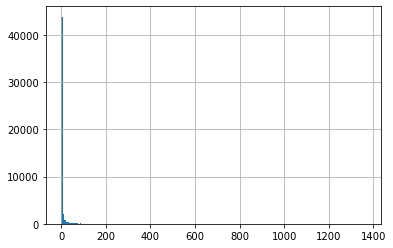

In [39]:
#2
import pickle

with open('all_tokens.pickle', 'rb') as file:
    all_tokens = pickle.load(file)
    
from collections import Counter
token_count = Counter(all_tokens)
token_freq = token_count.most_common()

# print(token_count)
# print(token_freq)

df2 = pd.DataFrame(token_freq, columns=['token', 'count'])
df2.head()

df2['count'].hist(bins=200)

#I notice that most tokens appear near 0 times, and only very few number of tokens appear more than a few times.  The histogram looks like large 
# grouping of tokens that appear once or barely more than once, with tokens that appear more than a few times being very rare.

Plot a histogram of the occurrences of tokens. What do you notice about the frequency of occurrence of different tokens? How does it look?

### Q3. 

Load `Phishing_clean.parquet`. This is the text from the e-mails broken into the most common 2,711 tokens and one-hot-encoded as features/covariates. So each row is an e-mail, the `Email Type` takes the value 1 if it's a scam and 0 otherwise, and every other column is a word or symbol that occurs in at least 15 e-mails.

1. Perform an 80/20 train-test split of the data.
2. Run a regression of $y$ on the one-hot-encoded emails. What is the $R^2$ on the test set? On the training set?
3. What words have the largest coefficients in absolute value and most strongly influence predictions? 

In [4]:
#3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df3 = pd.read_parquet('Phishing_clean.parquet')

# X = df3.drop('Email Type', axis=1)
# Y = df3['Email Type']




X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.2, random_state=100)

reg = LinearRegression().fit(X_train, Y_train)
print('R-squared: ', reg.score(X_train, Y_train))

NameError: name 'pd' is not defined

### Q4. 

Take the matrix of one-hot-encoded tokens (the data, less the outcome variable, `Email Type`) and perform a principal components analysis decomposition with two components. Plot the first two principal components in a scatter plot, and hue the points by whether they are a phishing scam or not. Do you notice any patterns?

### Q5.

Run a linear regression of $y$ on the first 2,610 principal components of $X$. What is the $R^2$ on the training and test sets? (I used cross validation to determine that 2,610 was approximately optimal, but not all 2,711 components.)

How does this performance compare to the linear regression?

### Q6.

Explain briefly in your own words what the advantage is in using the principal components to run this high-dimensional regression, rather than the original data.